# **Titanic: Machine Learning from Disaster**


# **Table of Contents**
1. [INTRODUCTION](#intro)
2. [EDA](#eda)
    1. [Import of libraries](#import)
    2. [Reading of dataset and explanation of variables](#lectura)
    3. [Previous analysis of the variables](#previo)
    4. [Deep analysis of variables](#profundidad)
        1. [PassengerId : Passenger Identifier](#PassengerId)
        1. [Pclass : Passenger Class](#Pclass)
        1. [Name : Passenger Name](#Name)
        1. [Sex : Passenger Sex](#Sex)
        1. [Age : Passenger Age](#Age)
        1. [SibSp : Number of passenger siblings/spouses](#SibSp)
        1. [Parch : Number of passenger parents/childs](#Parch)
        1. [Ticket : Passenger Ticket](#Ticket)
        1. [Fare : Cost of passenger cabin](#Fare)
        1. [Cabin : Number of the cabine passengers](#Cabin)
        1. [Embarked : Name of the embarked passengers](#Embarked)
        1. [Survived : Class predicted](#Survived)
    5. [Relaciones entre variables](#Relations)
        1. [Age and Sex](#Age_Sex)
        1. [Embarqued and Pclass](#Embarqued_Pclass)
        1. [Fare and Pclass](#Fare_Pclass)
        1. [Pclass and (Sibsp,Parch)](#Pclass_Family)
3. [Preparacion de dataset y creacion del modelo](#Prepare_create)
    1. [Preparacion de dataset para el modelo](#Prepare)
        1. [Eliminacion de variables sin informacion](#Delete)
        1. [Correlaccion entre Fare y Pclass](#Correlation)
        1. [Union Sibsp y Parch](#Union)
        1. [Categorizacion de Age](#Categorization)
    2. [Seleccion de Modelo](#Selection)

## **INTRODUCTION**
<a id="intro"></a>

![alt text](https://www.ecestaticos.com/imagestatic/clipping/26e/bcf/26ebcf2a63d0b63123e145d395075ea9/la-verdadera-historia-de-como-se-encontro-el-titanic.jpg "Logo Title Text 1")

The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early hours of 15 April 1912, after colliding with a iceberg during her maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history.  
With this brief introduction of the history of this dataset, we are going to explain the objective that we want to obtain with this analysis, first is to obtain greater knowledge of the variables that were taken into account in order to know what depended for a person to survive in the **Titanic** and finally get a predictive model that is able to guess with great certainty if a person would be able to survive or not.  
This dataset is separated into **Training** and **Test** to evaluate the success rate of our model. 

## **EDA**
<a id="eda"></a>

### **Import of libraries**
<a id="import"></a>

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #plots
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 30)#max columns to 30

Creation of visualization functions in graphs from bins and to realize of dataframe of percentage of the distribution of the dataset and being able to have use of bins.

In [9]:
def plot_hue_survived(data,valor,hue,bins=None):
    if(bins==None):
        g = sns.catplot(valor,hue=hue,data=data, kind='count')
        g.set_axis_labels(valor, 'Nº passengers')
    else:
        cuts=int(max(data[valor])/bins)
        data['Tmp'] = data[valor].map(lambda fare: cuts * (fare // cuts))
        g = sns.catplot('Tmp',hue=hue,data=data, kind='count')
        g.set_axis_labels(valor, 'Nº passengers')
    
def percentaje_of_(data,dato1,dato2,bins=None):
    if(bins!=None):
        data['Tmp']=pd.cut(data[dato1], bins)
        dato1='Tmp'
    group_by=data[[dato1, dato2]].groupby([dato1], as_index=False).count()
    group_by_2=group_by[dato2].tolist()
    percent=[(x / sum(group_by_2)*100) for x in group_by_2]
    d = {dato1: group_by[dato1].tolist(), '% Percent.': percent}
    dataframe=pd.DataFrame(data=d)
    return dataframe


### **Reading of dataset and explanation of variables**
<a id="lectura"></a>

In [21]:
#lectura del dataset train y test
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
print(train_df.columns.values)
print('_'*40)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked' 'Tmp']
________________________________________


This dataset have 12 colummns, which are:
* PassengerId :  This variable is an identifier.
* Pclass :  This variable muestra la clase que pertenece el pasajero.
* Name :  This variable show the name of the passengers.
* Sex :   This variable show the sex of the passengers.
* Age :  This variable show age of the passengers.
* SibSp :  This variable show he number of passenger siblings/spouses,
* Parch :  This variable number of passenger parents/childs.
* Ticket :  This variable show the name of the ticket passengers.
* Fare :  This variable show the cost of the cabin.
* Cabin : This variable show the number of the cabine passengers.
* Embarked : This variable show the name of the embarked passengers (C - Cherbourg, S - Southampton, Q = Queenstown).
* Survived :  This variable is the class that I want predict, which show if one person survived or no.

### **Previous analysis of the variables**
<a id="previo"></a>

A transformation of the data types will be carried out before visualizing the description of all the attributes of the dataset in order to obtain a more detailed view of them.  
To begin with, a transformation of the Survived attribute will be performed, which is int and the values is 0 or 1(0=Not Survived, 1=Survived) to boolean (True/False), which means True=survival and False=death.

In [24]:
train["Survived"]=train["Survived"].astype('bool')

Then the other categorical attributes, will be transformed from object type to category in order to have a detailed description of form of category and not of object.

In [23]:
train["Pclass"]=train["Pclass"].astype('category')
train["Sex"]=train["Sex"].astype('category')
train["Cabin"]=train["Cabin"].astype('category')
train["Ticket"]=train["Ticket"].astype('category')
train["Embarked"]=train["Embarked"].astype('category')
train.info()
train.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null bool
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null category
Fare           891 non-null float64
Cabin          204 non-null category
Embarked       889 non-null category
dtypes: bool(1), category(5), float64(2), int64(3), object(1)
memory usage: 80.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891,891.0,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,2,3.0,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,False,3.0,"Stanley, Mr. Edward Roland",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,549,491.0,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,NaN,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,NaN,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,NaN,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,NaN,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


This dataset have 12 colummns, which are:
* PassengerId : This variable is int, so it is a counter the passenger and we know that there are 891 total rows.
* Pclass : This variable is category and the range is 0 to 3, so I think that this variable show the class of the passengers and it is very important because the passenger with high class had more probability to survive. the most representative class of the dataset is the third class with a total of 491 passengers, i.e. 55% of the ship.
* Name : This variable is a object and it show the name of the passengers and this variable not is important to know if one person survived o not, besides each passenger has a different name, therefore we can not get anything in common.
* Sex : This variable is a category and this variable is important because if you were female, you had more probability to survive that male. The male sex represented the majority of the ship's passengers, to be exact 577 passengers were male, which is almost 65% of the passengers. 
* Age : This variable is int and the range is 0 to 80, so in the TItanic there was babys and aged, this variable is very important because the passengers younger had more probability to survive that olders. 75% of the passengers are around 38 years old and this metric has a great typical deviation, therefore the age of the population is not concentrated in a small range, i.e. the metric is very scattered, and it has 177 null values in the dataset.
* SibSp : This variable is int and the range is 0 to 8 and 75% of the passengers had only one spouse or sibling.
* Parch : This variable is int and the range is 0 to 6 and 75% of the passengers had no parents or children. I don't know that this metric is important, we will get out of doubt later when we do a more detailed analysis.
* Ticket : This variable is a category and the most frequent value is the cabin "CA. 2343" cabin, whose cabin was shared by 7 passengers.
* Fare : This variable is int and the range is 0 to 512, 75% of the population paid an average of 31 fare, this is because 75% of the boat was also 3rd class.
* Cabin : This variable is category, the most frequent category is "B96 B98" with 4, therefore that cabin had 4 passengers I don't know that this variable is important, because there are many nulls values, to be exact it has 687 null values that is equivalent to 77% of the dataset, therefore this value introduces a lot of inconsistency to the dataset.
* Embarked : This variable is category, the most frequent place of embarkation was Southampton with 644 passengers, which represents 72% of the passengers.
* Survived : This variable is a boolean, it is the class that I want predict, which show if one person survived or not. Furthermore with this description it is observed that most of the dataset has died to be exact 549 passengers, therefore 61% of the dataset died. This may then lead to a brief unbalanced problem but it is not the case as it is not as aggressive as other unbalanced datasets of 99% of one class and 1% of another class.

### **Deep analysis of variables**
<a id="profundidad"></a>

Previous information has been obtained, most of the passengers who were 3rd class, male, middle age, barely had relatives, boarded from Southampton. In addition most of this dataset died.  
Now we are going to make an in-depth analysis of each variable of the dataset and get information with greater interest.

In [69]:
train_df=train

#### **PassengerId : Passenger Identifier**
<a id="PassengerId"></a>

This attribute is not necessary its analysis in depth since directly as it says the name is an identifier, and therefore it is a value
which does not give information to the dataset, but is a row counter of the dataset.

#### **Pclass : Passenger Class**
<a id="Pclass"></a>

As mentioned above this attribute shows the class of the Titanic passenger, which should be quite interesting since according to the logic of having access to emergency boats first class people had priority while the rest of classes did not and were directly discarded for such boats.  
In order to do this, a depth analysis of such an attribute will be carried out in order to know what information it shows.  
The average of the attribute Survival is going to be made grouping by the attribute Class of passenger, as it is known that if the value Survival is equal to True it is that it survived, therefore we will obtain the percentage of survival of each class.

In [26]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


As far as we can see, the logic that has been mentioned above is fulfilled, that is to say, first class people are the people who had the highest survival rate, three times more than 3rd class passengers.  
In addition to this, this data will be shown but at a visual level and taking into account the passengers who have survived or not, with what is easier to interpret this attribute.

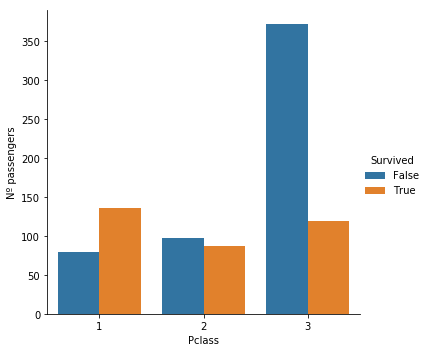

In [13]:
plot_hue_survived(train_df,"Pclass","Survived")

As far as can be evaluated by these visual and numerical results, it has been demonstrated that the logic of having greater survival in first class passengers, since by what is visualized the class that has had greater survival rate is the first, then the second and finally the third.  
Now we are going to visualize the distribution of passengers of each class to see the proportions we have of passengers according to their class belonging.

In [26]:
dataframe=percentaje_of_(train_df,'Pclass','PassengerId')
dataframe

,Pclass,% Percent.
0,1,24.242424
1,2,20.650954
2,3,55.106622


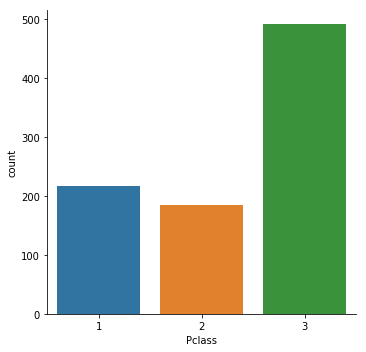

In [18]:
g = sns.catplot('Pclass',data=train_df, kind='count')

As you can see most of the passengers were 3rd class, to be more exact 55% of the crew, then we have 24% of the crew is first class and finally 20% is 2nd class.  

#### **Name : Passenger Name**
<a id="Name"></a>

This attribute is not necessary its analysis in depth because directly as it says the name is the name of the person, and therefore is a null value that does not give information to the dataset, but occurs as the antribute PassengerId.

In [59]:
train_df['Name'].describe(include='all')

count                         891
unique                        891
top       Jensen, Mr. Niels Peder
freq                            1
Name: Name, dtype: object

#### **Sex : Passenger Sex**
<a id="Sex"></a>

As mentioned above, this attribute shows the sex of the Titanic passenger, which should be quite interesting since according to the logic of access to emergency boats, people with female sex had priority over men.
In order to do so, the depth analysis of such an attribute will be repeated and we will find out if the logic of women surviving more than men is fulfilled, as it has been done previously to the attribute **Pclass**.  
The average of the Survival attribute is going to be made by grouping by the attribute Passenger sex, as was done previously and then find out the proportion of men and women in the crew.

In [27]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


As far as can be evaluated, in this case the logic of the titanic case is fulfilled: women were 6 times more likely to survive than men as is clearly seen, 74% survival if you were female while if you were male you only had 18% survival.  
Now we are going to visualize it graphically to clarify it better.

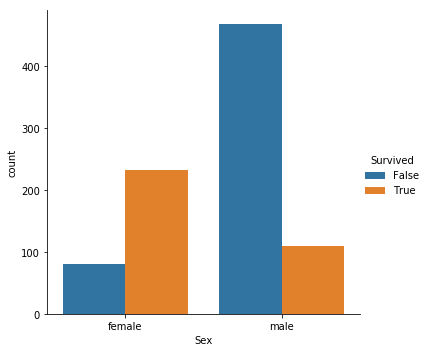

In [28]:
plot_hue_survived(train_df,"Sex","Survived")

As you can see, the female crew had a large number of survivors while the men have less than half, and clearly when they look at the case of death the difference between male and female is huge, so it is clear that if we were a female passenger we would get clearer that we could survive while being a man we would have to be lucky to survive this disaster.  
Now we are going to visualize the distribution of passengers based on sex to see the proportions we have of passengers based on their sex.

In [29]:
dataframe=percentaje_of_(train_df,'Sex','PassengerId')
dataframe

,Sex,% Percent.
0,female,35.241302
1,male,64.758698


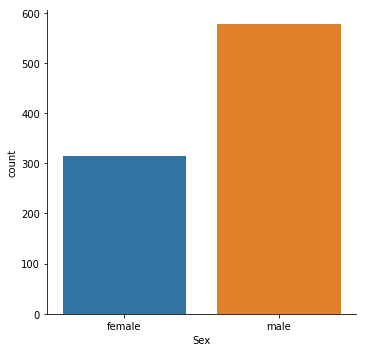

In [31]:
g = sns.catplot('Sex',data=train_df, kind='count')

For what can be observed in this visualization and its values of percentages, the majority of the crew is composed by the masculine sex and the difference is almost double and therefore, it is compressible the percentage of alive men since for the minimum could have survived some by the belonging class (1º class).

#### **Age : Passenger Age**
<a id="Age"></a>

In order to analyze this attribute, its description will be shown as the previous case and later on (Transformations Section) will be categorized in 3 categories (Child, Adult, Elderly) to be able to carry out an analysis more contudent to this variable and not to contain 80 ages to analyze, since as it was obtained, the range of this attribute is between 0 to 80 years.  
The value of this variable is because it is assumed that the youngest crew members had a higher priority to survive than the rest, therefore, it will be normal to see those results shown in what is going to develop.  
Since age is an integer and has 80 values, the average survival age will be made in 10 bins because it would be too many rows to analyze and it would be easier to analyze.

In [32]:
train_df['Tmp']=pd.cut(train_df['Age'], 10)
train_df[['Tmp', 'Survived']].groupby(['Tmp'], as_index=False).mean()
dataframe=percentaje_of_(train_df,'Age','PassengerId',10)

,Age_cut,Survived
0,"(0.34, 8.378]",0.666667
1,"(8.378, 16.336]",0.413043
2,"(16.336, 24.294]",0.355932
3,"(24.294, 32.252]",0.384615
4,"(32.252, 40.21]",0.440678
5,"(40.21, 48.168]",0.342857
6,"(48.168, 56.126]",0.466667
7,"(56.126, 64.084]",0.375000
8,"(64.084, 72.042]",0.000000
9,"(72.042, 80.0]",0.500000


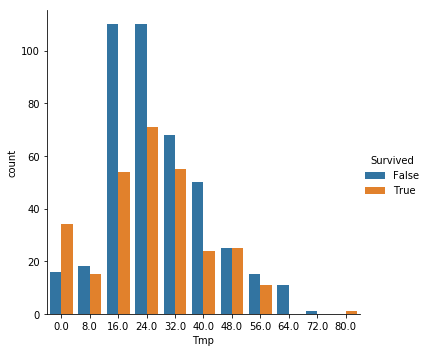

In [33]:
plot_hue_survived(train_df,"Age","Survived",10)

From what can be observed, young people between 0-10 years old have twice as many survivors and the highest survival rate that they have, and only in some specific cases of older people the rate of survivors is lower than the rate of deaths, so it is shown that crew members who are babies have a better chance of surviving than the rest.  
Now we are going to carry out an analysis of the age distribution of the crew, and have knowledge of how the crew is composed.

In [34]:
dataframe=percentaje_of_(train_df,'Age','PassengerId',10)
dataframe

,Tmp,% Percent.
0,"(0.34, 8.378]",7.563025
1,"(8.378, 16.336]",6.442577
2,"(16.336, 24.294]",24.789916
3,"(24.294, 32.252]",23.669468
4,"(32.252, 40.21]",16.526611
5,"(40.21, 48.168]",9.803922
6,"(48.168, 56.126]",6.302521
7,"(56.126, 64.084]",3.361345
8,"(64.084, 72.042]",1.260504
9,"(72.042, 80.0]",0.280112


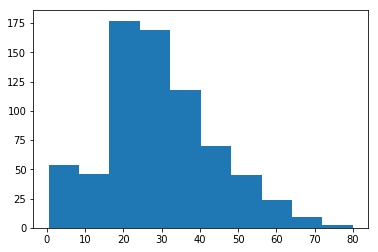

In [35]:
train_df['Age'].hist(bins=10,grid=False);

As can be seen in the graph, the fashion of the age is between 18 and 34 years approximately, therefore most of the crew are young people, then descending the number of crew the older their age, and as you can see the crew has approximately 95 crewmembers under the age (55 children between 0-10 years and 40 children between 10-18 years).  
Therefore, these last crew members we have mentioned are the ones who have a greater tendency to survive while the older crew members tend to have a lower probability of survival the older their age.  

#### **SibSp : Number of passenger siblings/spouses**
<a id="SibSp"></a>

This attribute, as its name implies, shows the number of siblings/wife the passenger has, so the analysis will be repeated to see their dependence on the Survival class and also to analyze their distribution throughout the distribution.  
In this way we will be able to understand in greater depth the meaning of this variable and its importance in the future.

In [36]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


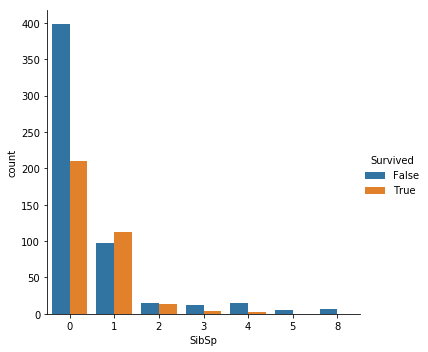

In [37]:
plot_hue_survived(train_df,"SibSp","Survived")

As can be seen with the results obtained from the Survived class average grouped by SibSp, crewmembers with 1 or 2 siblings/wife have a higher probability rate compared to the others.  
Also it is observed in the graph that having a value 0 in this attribute we have a % of survivors altisimo but also taking into account that the double of these crewmen died, these so high values are due to that the majority of crew of the Titanic did not have neither brothers nor wife.  
This attribute together with the Number of parents and children is conditional to the survival of the person since a person who has a relative will cling more to life than a person who has no relative, but it is a double-edged sword because if a person has many relatives will risk more life to help survive another family member.  
So this variable generates a little confusion to get some conclusion using logic, but seeing the data shows that people with 1 or 2 siblings / wife have a higher probability rate compared to others, but we will explore these assumptions in the following sections.   
Now we are going to analyze the distribution of siblings / wives that was in the Titanic crew and thus know the components of the dataset.

In [38]:
dataframe=percentaje_of_(train_df,'SibSp','PassengerId')
dataframe

,SibSp,% Percent.
0,0,68.237935
1,1,23.456790
2,2,3.142536
3,3,1.795735
4,4,2.020202
5,5,0.561167
6,8,0.785634


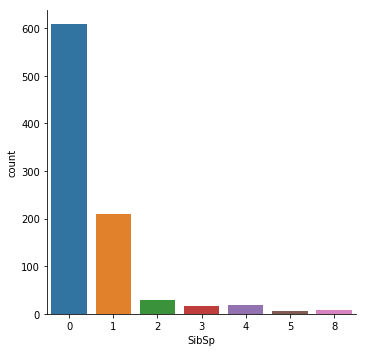

In [39]:
g = sns.catplot('SibSp',data=train_df, kind='count')

As you can see, 68% of the crew has no siblings/spouses and 23% has only one sibling/spouse, so you can know that the distribution of the crew with this variable is almost always 0 or 1 and rarely greater than these values as you can see there are cases that have 8, leading to 7 siblings and 1 spouse.  
But from what we have been able to analyze using this Attribute that for now most of the crew had no family relationship within the Titanic.

#### **Parch : Number of passenger parents/childs**
<a id="Parch"></a>

This attribute, as its name says, shows the number of parents/children that the passenger has, therefore the analysis will be repeated to see its dependence on the Survival class and also analyze its distribution throughout the distribution.  
In this way we will be able to understand in greater depth the meaning of this variable and its importance in the future.

In [40]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


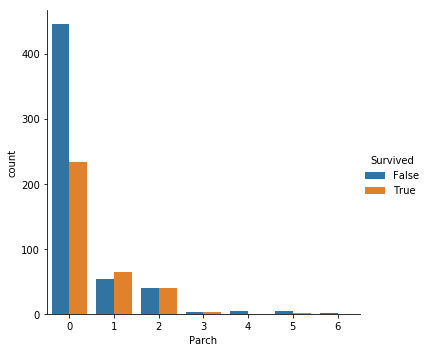

In [41]:
plot_hue_survived(train_df,"Parch","Survived")

As far as can be analyzed, passengers who did not have parents or children had a high death rate, while those who have 1, 2 or 3 have more or the same chances of surviving. For the same reasoning that I have given previously to have relatives can give them more desire to survive and cling to life.  
Now we are going to analyze the distribution of parents / children that was in the Titanic crew and thus know the components of the dataset.

In [42]:
dataframe=percentaje_of_(train_df,'Parch','PassengerId')
dataframe

,Parch,% Percent.
0,0,76.094276
1,1,13.243547
2,2,8.978676
3,3,0.561167
4,4,0.448934
5,5,0.561167
6,6,0.112233


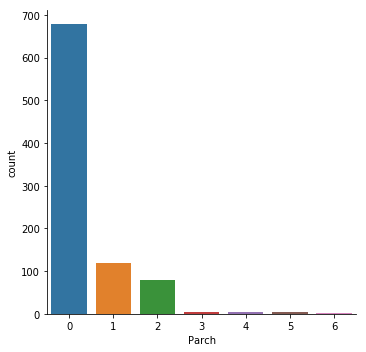

In [43]:
g = sns.catplot('Parch',data=train_df, kind='count')

Therefore 76% of the crew had no parents or children on the boat, while the most common after having no family was to have 1 or 2 parents/children.  
It is seen that the distribution of this variable is similar to that of spouses/sisters, therefore in the following section of transformation of variables, proceed to join these variables in a single that will be called "Family" and thus remove complexity to the model and analysis in greater depth of dependencies between variables.

#### **Ticket : Passenger Ticket**
<a id="Ticket"></a>

This attribute is not necessary in depth because directly as it says the name is an identifier of the passenger ticket, and therefore is a null value that does not give information to the dataset, since of the 891 rows that is composed the dataset, there are 681 unique values, so you will not identify valuable information in the dataset from this metric.

In [60]:
train_df['Ticket'].describe(include='all')

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

#### **Fare : Cost of passenger cabin**
<a id="Fare"></a>

This attribute shows the cost of the cabin that the passenger has, therefore the analysis is going to be repeated to see its dependence on the Survival class and in addition to it analyze its distribution throughout the dataset, this variable will have a relationship with Pclass because if a passenger pays a high cabin price will mean that this passenger will belong to first class, therefore, with this relationship the people who have paid less will have a higher death rate than the people who have paid more.
In this way, the meaning of this variable and its importance in the future can be understood in greater depth.

In [45]:
train_df['Tmp']=pd.cut(train_df['Fare'], 10)
train_df[['Tmp', 'Survived']].groupby(['Tmp'], as_index=False).mean()

,Tmp,Survived
0,"(-0.512, 51.233]",0.318306
1,"(51.233, 102.466]",0.660377
2,"(102.466, 153.699]",0.741935
3,"(153.699, 204.932]",1.000000
4,"(204.932, 256.165]",0.636364
5,"(256.165, 307.398]",0.666667
6,"(307.398, 358.63]",NaN
7,"(358.63, 409.863]",NaN
8,"(409.863, 461.096]",NaN
9,"(461.096, 512.329]",1.000000


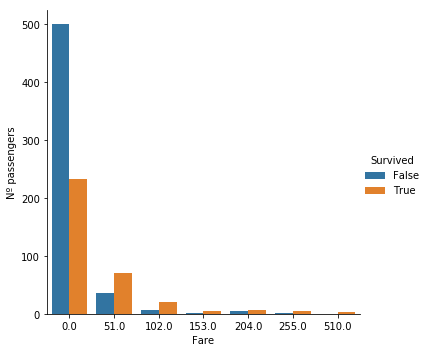

In [53]:
plot_hue_survived(train_df,"Fare","Survived",10)

It can be analyzed that most of the passengers who paid a low cost of 51 have twice the chances of dying while people who passed that price limit, increased their chances of surviving the higher the price they had paid, so that this variable is totally related to the classes of the crew but later will talk about all the relationships between variables, and also in the transformation section can remove this variable because we have that information in Pclass.  
Now we are going to analyze the distribution of the variable to see how many people had paid large amounts of money on the boat and who went with a low level of spending.

In [54]:
dataframe=percentaje_of_(train_df,'Fare','PassengerId',10)
dataframe

,Tmp,% Percent.
0,"(-0.512, 51.233]",82.154882
1,"(51.233, 102.466]",11.896745
2,"(102.466, 153.699]",3.479237
3,"(153.699, 204.932]",0.224467
4,"(204.932, 256.165]",1.234568
5,"(256.165, 307.398]",0.673401
6,"(307.398, 358.63]",0.000000
7,"(358.63, 409.863]",0.000000
8,"(409.863, 461.096]",0.000000
9,"(461.096, 512.329]",0.336700


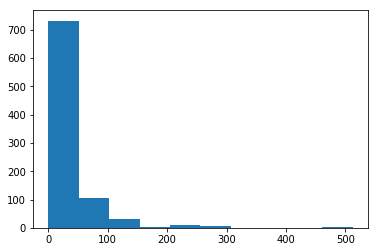

In [55]:
train_df['Fare'].hist(bins=10,grid=False);

The distribution of the crew with the cost of the rate they made is quite concentrated in the crew who spent very little on the rate of the boat, to be exact 82%, while 11% paid a maximum of 102 and the rest of the crew is distributed with greater variation in the other ranges of the variable, which is quite similar to the distribution of the varable Pclass.

#### **Cabin : Number of the cabine passengers**
<a id="Cabin"></a>

This variable is not going to be analyzed, since we have a total of 687 null values that is equivalent to 77% of the dataset, therefore this value introduces a lot of inconsistency to the dataset and we are not going to get anything that we can take into account in our analysis.

In [56]:
train_df['Cabin'].describe(include='all')

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

#### **Embarked : Name of the embarked passengers**
<a id="Embarked"></a>

This attribute shows the name from where the passenger boarded, therefore the analysis will be repeated to see its dependence on the Survival class and also analyze its distribution throughout the dataset.
In this way, the meaning of this variable can be understood with greater depth and if this variable is important, because people who have embarked from one place may have a greater probability of surviving than other people.

In [62]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


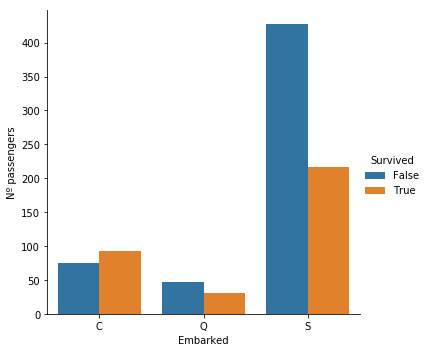

In [64]:
plot_hue_survived(train_df,"Embarked","Survived")

Passengers from S(Southampton) and Q(Queenstown) had a very high death rate (~65%) compared to the other crew members from C (Cherbourg), having a higher probability of surviving than the rest, since 55% of these crew members survived, therefore, the people who embarked through those areas had higher death rates, so there must be an indication of this high rate, for example the pocedente people of Southampton may be all 3rd class crew members and therefore this high probability of dying is justified.  
Now we are going to see the distribution of the dataset according to the area of embarkation and thus be able to know where they were procendentes the majority of the crew.

In [65]:
dataframe=percentaje_of_(train_df,'Embarked','PassengerId')
dataframe

,Embarked,% Percent.
0,C,18.897638
1,Q,8.661417
2,S,72.440945


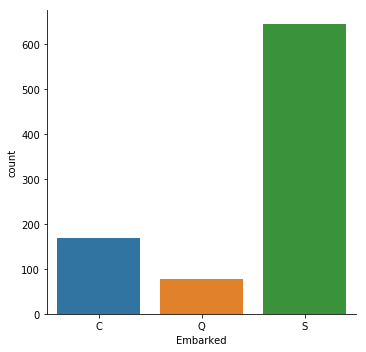

In [66]:
g = sns.catplot('Embarked',data=train_df, kind='count')

The distribution of the passengers is concentrated in boarding in S(Southampton) having a total of 72% of the dataset, which is one of the zones where they had high rate of dying, therefore the majority of the crew is constituted by people of Southampton, and then comes the crew of C (Cherbourg) with 18% and finally Q(Queenstown) with the remaining 8%.

#### **Survived : Class predicted**
<a id="Survived"></a>

In order to finish this section we are going to analyze the last variable that is the class we want to predict, the survival variable, for it we are going to obtain its distribution of surviving passengers and a visualization of it and thus to have more detailed constancy of how many crew members survived.

In [67]:
dataframe=percentaje_of_(train_df,'Survived','PassengerId')
dataframe

,Survived,% Percent.
0,False,61.616162
1,True,38.383838


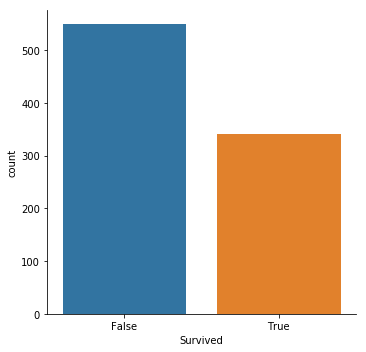

In [68]:
g = sns.catplot('Survived',data=train_df, kind='count')

As you can see most of the Titanic's crew died (~61%), which is a great catastrophe in history as a large number of lives were lost.
With this ends the analysis in greater detail of each variable, now we will analyze the variables combining them looking for possible relationships between them and making transformations to get more information about their relationships with the prediction variable and ending with the creation of prediction models.

### **Relaciones entre variables**
<a id="Relations"></a>

#### **Age and Sex**
<a id="Age_Sex"></a>

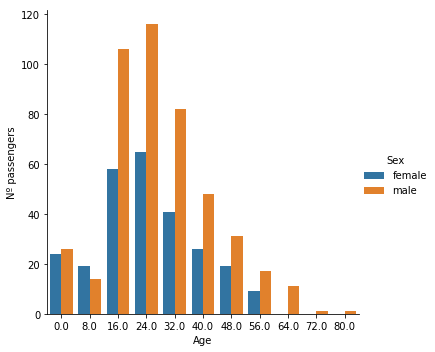

In [72]:
plot_hue_survived(train_df,"Age","Sex",10)

#### **Embarqued and Pclass**
<a id="Embarqued_Pclass"></a>

#### **Fare and Pclass**
<a id="Fare_Pclass"></a>

#### **Pclass and (Sibsp,Parch)**
<a id="Pclass_Family"></a>

## **Preparacion de dataset  y creacion del modelo**
<a id="Prepare_create"></a>

### **Preparacion de dataset para el modelo**
<a id="Prepare"></a>

In [57]:
train_df=train
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### **Eliminacion de variables sin informacion**
<a id="Delete"></a>

In [58]:
train_df=train_df.drop("PassengerId", axis=1)
train_df=train_df.drop("Name", axis=1)
train_df=train_df.drop("Ticket", axis=1)
train_df=train_df.drop("Cabin", axis=1)
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

#### **Correlaccion entre Fare y Pclass**
<a id="Correlation"></a>

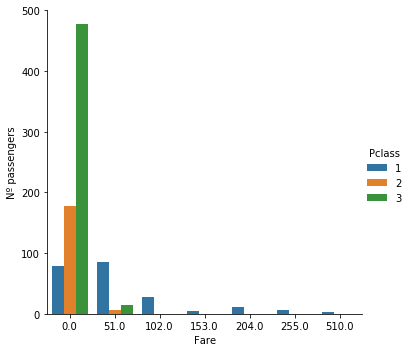

In [18]:
plot_hue_survived(train_df,"Fare","Pclass",10)

Existe una breve correlacion entre las dos variables ya que cuanto mayor sea el precio, tiene mayor probabilidad de pertener a clases con mayor privilegios, y a la inversa, por lo tanto se tendra que tomar la decision de descartar una de estas variables y solo usar de ella, permitiendo que el modelo generalize y no tengamos problema de overfitting.

#### **Union Sibsp y Parch**
<a id="Union"></a>

In [59]:
train_df["Family"]=train_df["SibSp"]+train_df["Parch"]
train_df=train_df.drop("SibSp", axis=1)
train_df=train_df.drop("Parch", axis=1)
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family'], dtype='object')

Se ha juntado los dos atributos en uno, por lo tanto se ha modificado el dataframe sustituyendo los atributos Sibsp y Parch por Family, la cual contendra el número de familiares que tiene el pasajero del Titanic.

#### **Categorizacion de Age**
<a id="Categorization"></a>

In [60]:
train_df["Age"]=pd.cut(train_df['Age'], bins=[0, 8, 18, 50,100], include_lowest=True, labels=['Niño', 'Joven', 'Adulto','Viejo'])

Se ha realizado una categorizacion del Atributo Age en 4 categorias las cuales son las siguientes:
* Niño : [0-8]
* Joven : [8-18]
* Adulto : [18:50] 
* Viejo : [50-100]  
Este cambio podria ayudar a mejorar nuestro modelo, pero eso lo comprobaremos mas adelante a ver como se comporta.

### **Seleccion de Modelo**
<a id="Selection"></a>